[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week5_Statistics_Sprint_Challenge.ipynb)

## **Probability and Statistics**


The journey into Statistics this week can be distilled into the following objectives:

a) Conduct Quantitative Data Analysis

b) Perform Graphical Data Analysis

c) Use Statistical Techniques to make quantitative statements on data (encompassing discrete and continuous variables)



In this Sprint Challenge, we are going to use the "Loans" data set. The data set contains information about applicants who have applied for home loans, their monthly incomes, the loan amount (in 000's) the property type they are seeking, Credit History (0 indicates no credit history) and their associated loan status.



The dataset can be retrieved from here: https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1

Create solutions for the following code blocks. This exercise should take ~ 3 hours.

Share with mlsubmissions@lambdaschool.com when finished.


In [143]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load the dataset
data = pd.read_csv("https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1")
print ("Columns:")
print (data.columns)
print ("\n")
#print (data.head(10))

Columns:
Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')




**Step 1:** Examine the data set for any missing values

In [144]:
print (data.shape)
print (data.isnull().sum())

(614, 13)
LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64


**Step 2:** If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please use the tips provided in the article to deal with missing values

Out of the columns with missing values, 'Gender', 'Married', 'Dependents', 'Self_Employed', and 'CreditHistory' are clearly categorical, while 'LoanAmount' is numeric. 'Loan_Amount_Term' is numeric. \\
Let's use median value in 'Loan Amount' and most frequent values for remaining columns to fill Nan's

In [146]:
# fill the self_employed column with most frequently occuring values in that column.
x = data['Self_Employed'].value_counts().idxmax()
data.Self_Employed.fillna(x, inplace = True)
#For Gender
y = data['Gender'].value_counts().idxmax()
data.Gender.fillna(y, inplace = True)  

#Dependents
z = data['Dependents'].value_counts().idxmax()
data.Dependents.fillna(z, inplace = True)

#Loan_Amount_Term
a = data['Loan_Amount_Term'].value_counts().idxmax()
data.Loan_Amount_Term.fillna(a, inplace = True) 

#Credit History
b = data['CreditHistory'].value_counts().idxmax()
data.CreditHistory.fillna(b, inplace = True)

#Married
c = data['Married'].value_counts().idxmax()
data.Married.fillna(c, inplace = True)

# fill the loan amount column with median
y = data['LoanAmount'].median()
data.LoanAmount.fillna(y, inplace = True)

#Since, there were few rows with Nan's for married. Let's remove them.
#data = data.dropna()

#check for Nan's
print (data.isnull().sum())

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64


**Step 3:**  Conduct Quantitative Data Analysis - Compute summary statistics i.e. Mean, Median, Standard Deviation, Variance for:

1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

In [147]:
def compute_summary_statistic(data,col):  
    mean = data[col].mean()
    median = data[col].median()
    stdd = data[col].std()
    variance = data[col].var()
    print ("Mean ",mean)
    print ("median ",median)
    print ("standard deviation ",stdd)
    print ("variance ",variance)
print ("Summary statistic for Applicant Income:")
compute_summary_statistic(data,'ApplicantIncome')
print ("\n")

print ("Summary statistic for Total Income:")
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
compute_summary_statistic(data,'Total_Income')    
print ("\n")

print ("Summary statistic for Loan Amount:")    
compute_summary_statistic(data,'LoanAmount')    
print ("\n")

print ("Summary statistic for Loan Term:")    
compute_summary_statistic(data,'Loan_Amount_Term')    

Summary statistic for Applicant Income:
Mean  5403.459283387622
median  3812.5
standard deviation  6109.041673387178
variance  37320390.16718121


Summary statistic for Total Income:
Mean  7024.705081414722
median  5416.5
standard deviation  6458.66387219434
variance  41714339.01398839


Summary statistic for Loan Amount:
Mean  145.75244299674267
median  128.0
standard deviation  84.10723338042614
variance  7074.026706909469


Summary statistic for Loan Term:
Mean  342.4104234527687
median  360.0
standard deviation  64.42862906767307
variance  4151.048243539807


**Step 4:** Perform Graphical Data Analysis:

a) Contruct an ECDF to analyze the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

b) Overlay each of the ECDF plots with markers (i.e. Diamonds) depicting the corresponding 25th, 50th and 75th percentiles respectively

c) Build Histograms to examine the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

d) Create BoxPlots to understand the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

e) Construct Bee Swarm Plots to analyze the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

g) Plot a Stacked Bar Chart showcasing Count of Applicants by Loan Status and Gender. The Gender attribute is color coded within the stacked bar chart

[2877.5 3812.5 5795. ]


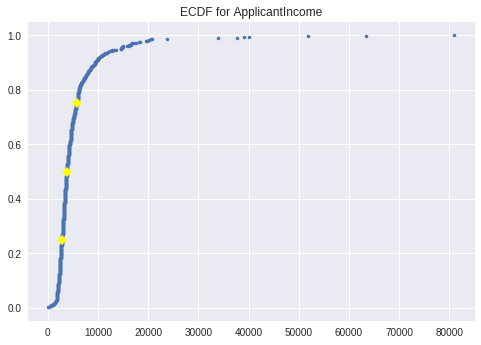

[4166.   5416.5  7521.75]


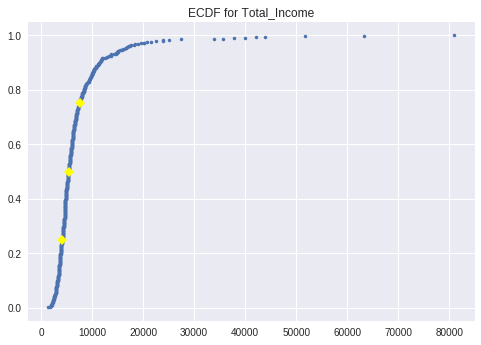

[100.25 128.   164.75]


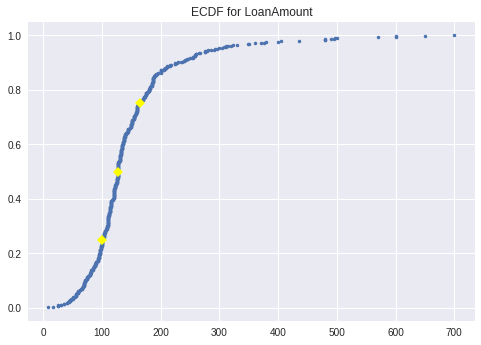

[360. 360. 360.]


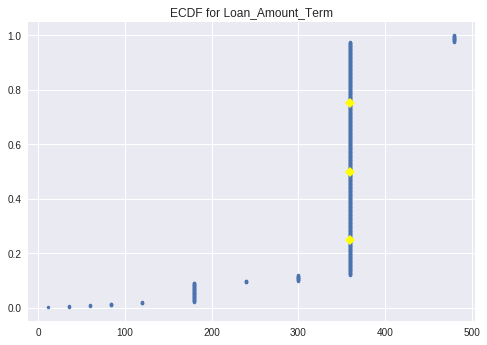

In [149]:
#compute ECDF and plotting them
def compute_ECDF(data,col):
  data_app_income = data[col]
  xs = np.sort(data_app_income)
  ys = np.arange(1, len(xs) + 1)/len(xs)
  percentiles = np.array([25,50,75])
  # Calculate the percentiles
  ptiles = np.percentile(data[col], percentiles)
  print (ptiles)
  plt.plot(xs, ys, marker='.',linestyle='none')
  plt.plot(ptiles,percentiles/100, marker='D', color='yellow', linestyle='none')
  plt.title("ECDF for "+ col)
  plt.show()
  
compute_ECDF(data,'ApplicantIncome')  
compute_ECDF(data,'Total_Income')  
compute_ECDF(data,'LoanAmount')
compute_ECDF(data,'Loan_Amount_Term')

From the above graphs, we can conclude that none of the variables are linearly distributed all of them has outliers. \\
The distribution for loan_amount_term is steeper around 360 and more data is available there. \\
The distribution for Applicant_income and Total_income is steeper between 0 and 1000 and more data is available there. \\
If we plot the same using histograms, we can see the clusters where more data is present.

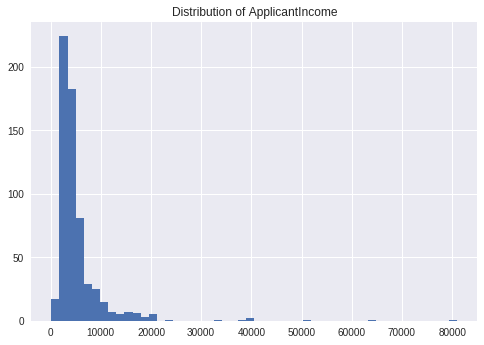

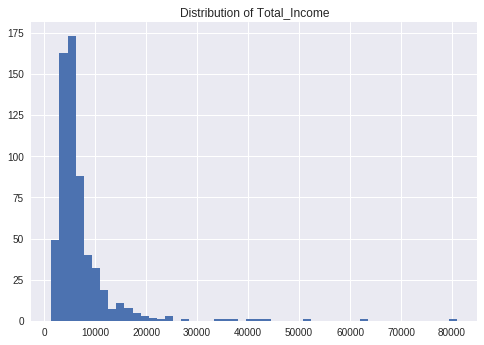

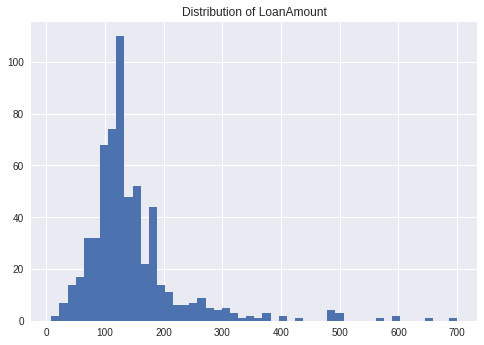

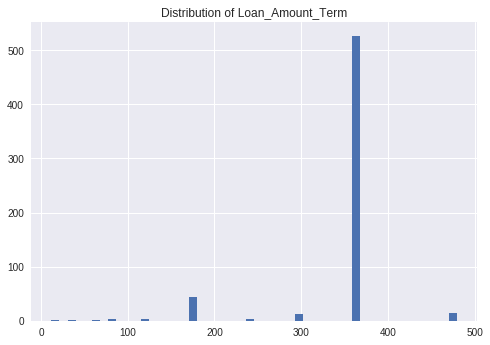

In [150]:
# Build Histograms to examine the distribution of 
# 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term
def plot_histograms(data,col):
  plt.hist(data[col],bins = 50)
  plt.title("Distribution of "+col)
  plt.show()

plot_histograms(data,'ApplicantIncome')
plot_histograms(data,'Total_Income')
plot_histograms(data,'LoanAmount')
plot_histograms(data,'Loan_Amount_Term')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


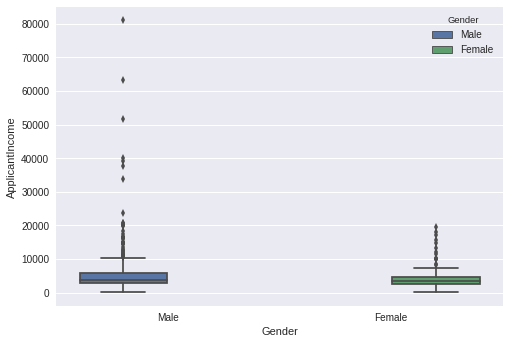

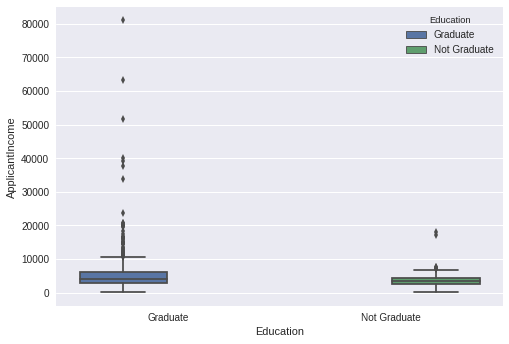

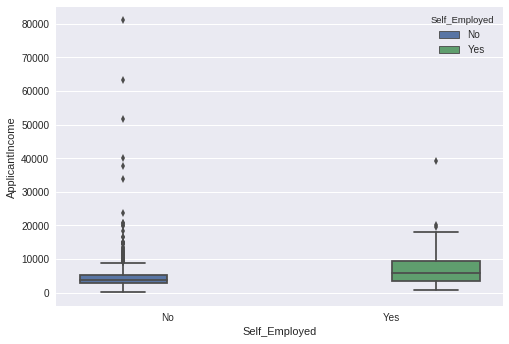

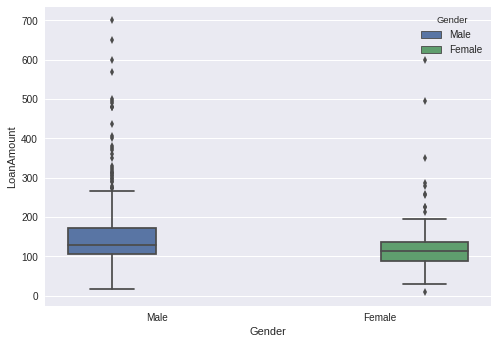

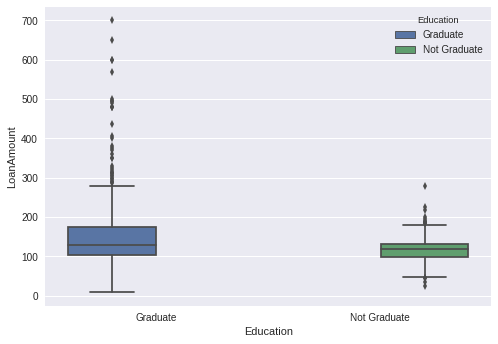

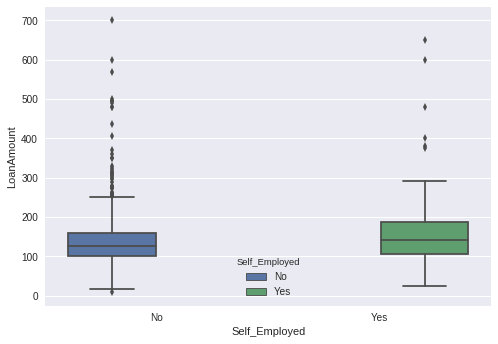

In [151]:
#Create BoxPlots to understand the distribution of 

import seaborn as sns

#1) Application Income By Gender of Applicant,
sns.boxplot(x="Gender",y="ApplicantIncome",data=data,hue = "Gender")
plt.show()

#2) Application Income By Education of Applicant, 
sns.boxplot(x="Education",y="ApplicantIncome",data=data,hue ="Education")
plt.show()

#3) Application Income by Employment Type, 
sns.boxplot(x="Self_Employed",y="ApplicantIncome",data=data,hue ="Self_Employed")
plt.show()

#4) Loan Amount by Gender of Applicant, 
sns.boxplot(x="Gender",y="LoanAmount",data=data,hue ="Gender")
plt.show()

#5) Loan Amount by Education of Applicant,
sns.boxplot(x="Education",y="LoanAmount",data=data,hue ="Education")
plt.show()

#6) Loan Amount by Employment Type
sns.boxplot(x="Self_Employed",y="LoanAmount",data=data,hue ="Self_Employed")
plt.show()

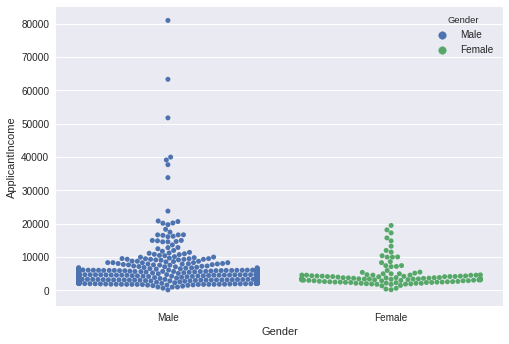

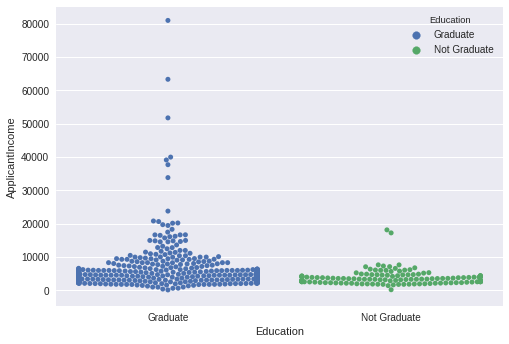

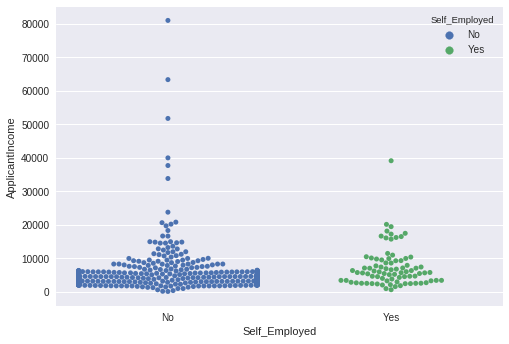

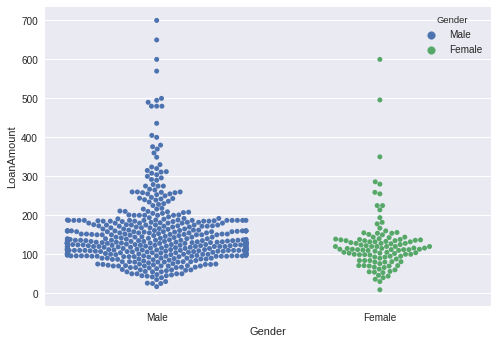

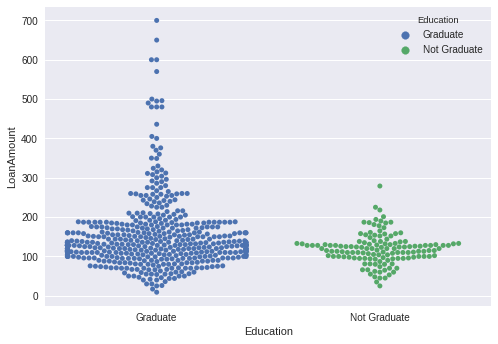

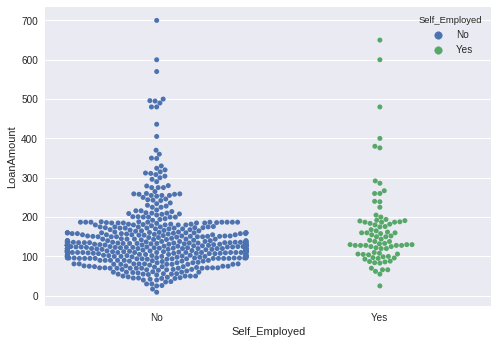

In [152]:
#e) Construct Bee Swarm Plots to analyze the distribution of 

#1) Application Income By Gender of Applicant, 
sns.swarmplot(x='Gender', y='ApplicantIncome', data=data, hue = 'Gender')
plt.show()

#2) Application Income By Education of Applicant,
sns.swarmplot(x='Education', y='ApplicantIncome', data=data, hue = 'Education')
plt.show()

#3) Application Income by Employment Type, 
sns.swarmplot(x='Self_Employed', y='ApplicantIncome', data=data, hue = 'Self_Employed')
plt.show()

#4) Loan Amount by Gender of Applicant, 
sns.swarmplot(x='Gender', y='LoanAmount', data=data, hue = 'Gender')
plt.show()

#5) Loan Amount by Education of Applicant, 
sns.swarmplot(x='Education', y='LoanAmount', data=data, hue = 'Education')
plt.show()

#6) Loan Amount by Employment Type
sns.swarmplot(x='Self_Employed', y='LoanAmount', data=data, hue = 'Self_Employed')
plt.show()

LoanStatus    N    Y
Gender              
Female       37   75
Male        155  347


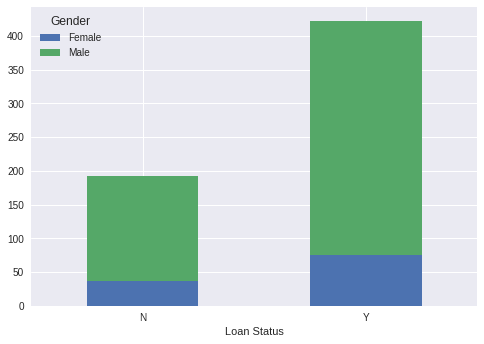

In [156]:
#f) Plot a Stacked Bar Chart showcasing Count of Applicants by Loan Status and Gender. 
#The Gender attribute is color coded within the stacked bar chart
ct = pd.crosstab(data.Gender,data.LoanStatus)
print (ct)
ax = ct.T.plot(kind='bar', stacked=True, rot=0)
ax.set(xlabel='Loan Status');

**Step 5: ** Compute the chances of securing/getting a loan based on Credit History

Hint: Will require the use of the crosstab function

In [162]:
crosstab = pd.crosstab(data['CreditHistory'],data['LoanStatus'])
print (crosstab)

LoanStatus       N    Y
CreditHistory          
0.0             82    7
1.0            110  415


In total, 422 people has taken loan. 415 people has taken with good credit history while, 7# people only has taken with bad credit history.

In [172]:
# probability of getting loan with credit history 1.0
prob_good_credit = 415/(110+415)
print ("probability of getting loan with credit history 1.0 is ",prob_good_credit)

## probability of getting loan with credit history 0.0
prob_low_credit = 7/(7+82)
print ("probability of getting loan with credit history 0.0 is ",prob_low_credit)

probability of getting loan with credit history 1.0 is  0.7904761904761904
probability of getting loan with credit history 0.0 is  0.07865168539325842


**Step 6:** Use Statistical Techniques to make quantitative statements on data

**1)** Detect relationships in the Loan dataset. 

For example: 

a) Does the 'Applicant Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Applicant Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. 

b) Does the 'Total Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Total Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

c) Are there any other variables that vary together? Construct a scatter plot that plots the respective variables. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.


**2)** Gauge the strength of the relationships

For example:

a) Compute the Correlation Coefficient between the 2 variable i.e. 'Applicant Income' and the 'Loan Amount'.

b) Compute the Correlation Coefficient between the 2 variable i.e. 'Total Income' and the 'Loan Amount'.
 
c) Compute the Correlation Coefficient between the pair of variables you have identied
  

In [0]:
#Draw a heat of correlation coefficients.

from sklearn.preprocessing import LabelEncoder
data_encoded = data.copy()
for label in ['Gender', 'LoanID', 'Married', 'Education', 'Self_Employed','PropertyArea','LoanStatus',"Dependents"]:
  data_encoded[label] = LabelEncoder().fit_transform(data_encoded[label])

#print(data_encoded.head(10))

In [0]:
#sns.pairplot(data_encoded,kind="scatter",size=1.6, plot_kws={'s': 30, 'alpha': 0.2}, diag_kws={'edgecolor':'black'}, palette={0:'#EB434A', 1:'#61A98F'})

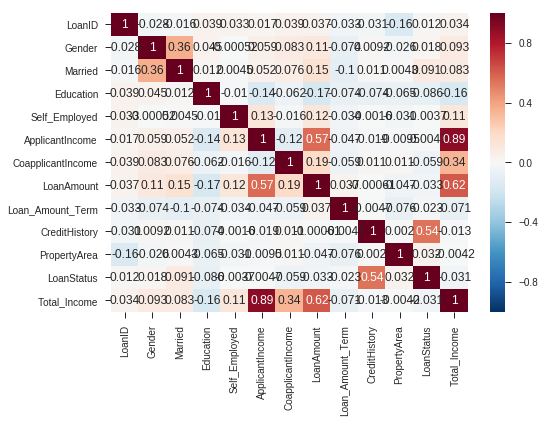

In [197]:

sns.set(style='ticks', color_codes=True)
sns.heatmap(data_encoded.corr(), linecolor='white', annot=True)
plt.show()

Observations: \\
1) Applicant income has strong positive correlation with total_income \\
2) Loan amount has a relation with Total income \\
3) Applicant Income has a strong relation with Loan Amount \\
4) Credit history has a relation with Loan Status \\
5) Need to explore relation between Gender and Married \\
6) Applicant Income has negative correlation with Co-applicant Income.



Text(0,0.5,'CoapplicantIncome')

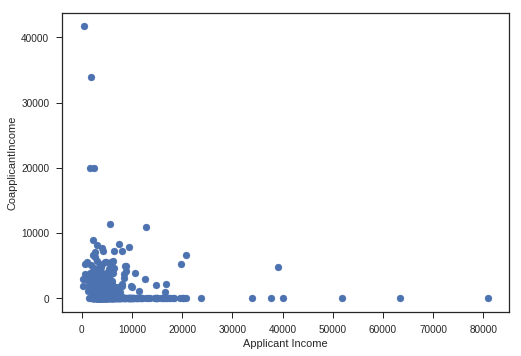

In [182]:
#Applicant Income vs CoapplicantIncome

plt.scatter(data['ApplicantIncome'],data['CoapplicantIncome'])
plt.xlabel("Applicant Income")
plt.ylabel("CoapplicantIncome")

In [185]:
#compute correlation
print (np.corrcoef(data['ApplicantIncome'],data['CoapplicantIncome'])[0][1])

-0.11660458122889966


Applicants with lower income seems to have similar income with their co-applicants.These two have a negative correlation and hence we can expect negative correlation.

In [183]:
#compute covariance
print (np.cov(data['ApplicantIncome'],data['CoapplicantIncome'])[0][1])

-2084490.3357900244


**Loan Amount vs Total Income**

Text(0,0.5,'Total_Income')

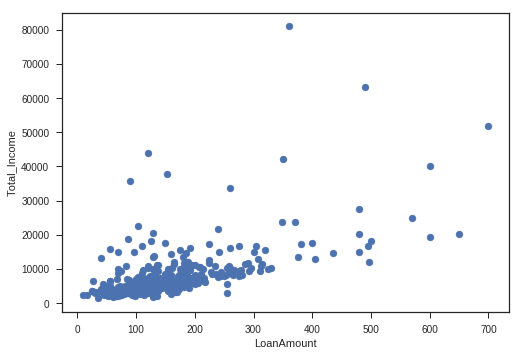

In [177]:
#Loan Amount vs Total Income
plt.scatter(data['LoanAmount'],data['Total_Income'])
plt.xlabel("LoanAmount")
plt.ylabel("Total_Income")

Observations: \\
There are are more number of people with income between 0 and 2000 has loan amount between 0 and 350. \\
very Few people has loans with higher Income. \\
only few people has higher loan amount. \\
From the above graph, Loan Amount and Total_income are positively correlated. Hence, We can expect a positive covariance.


In [187]:
#compute correlation
print (np.corrcoef(data['LoanAmount'],data['Total_Income'])[0][1])

0.6203155389930869


In [178]:
#compute covariance
print (np.cov(data['LoanAmount'],data['Total_Income'])[0][1])

336968.02396925807


**Applicant Income Vs Total Income**

Text(0,0.5,'LoanAmount')

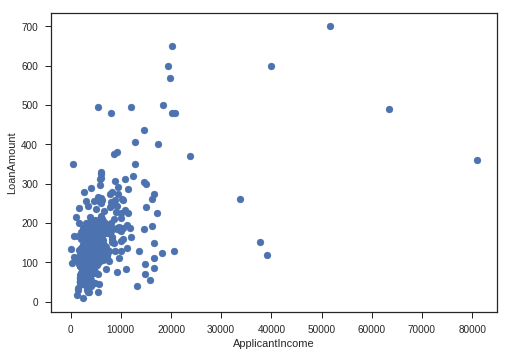

In [179]:
#Applicant Income vs Loan Amount
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")

Observations: \\
From the above plot, we can observe that, only people with income less than 2000 has taken more loans and applicants with income greater than 2000 has very few loans. Loan Amount increases as the applicant income increases. \\
Applicant Income and Loan Amount are positively correlated and hence we can expect positive covariance.

In [186]:
#compute correlation
print (np.corrcoef(data['ApplicantIncome'],data['LoanAmount'])[0][1])

0.5651805176233123


In [180]:
#compute covariance
print (np.cov(data['ApplicantIncome'],data['LoanAmount'])[0][1])

290397.99806048104


**Step 7:** Use Statistical Techniques to make quantitative statements on data. We will use a) Spearman's Rank Correlation, b) Chi-Square tables

1) Detect relationships amongst categorical, non-linearly related and non-normally distributed variables in the Loan dataset

For example: 

  a) Construct a Scatter Plot of 'Loan Term' amd 'Credit History' to verify that the variables are related non-lineraly. Create a Histogram for "Loan Term" and 'Credit History' to ascertain that they are 
     not-normally distributed. A visual examination of the data proves that 'Loan Term' and 'Credit History' are numeric variables that can be placed in categories.

  b) Compute the Spearman's Rank Correlation Coefficient

  c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

2) Use Spearman's Rank to find the correlation between **other ** categorical, non-linearly related and non-normally distributed variables.

*Hint*: There are categorical variables in the dataset that can be coded as numeric values i.e. 0,1

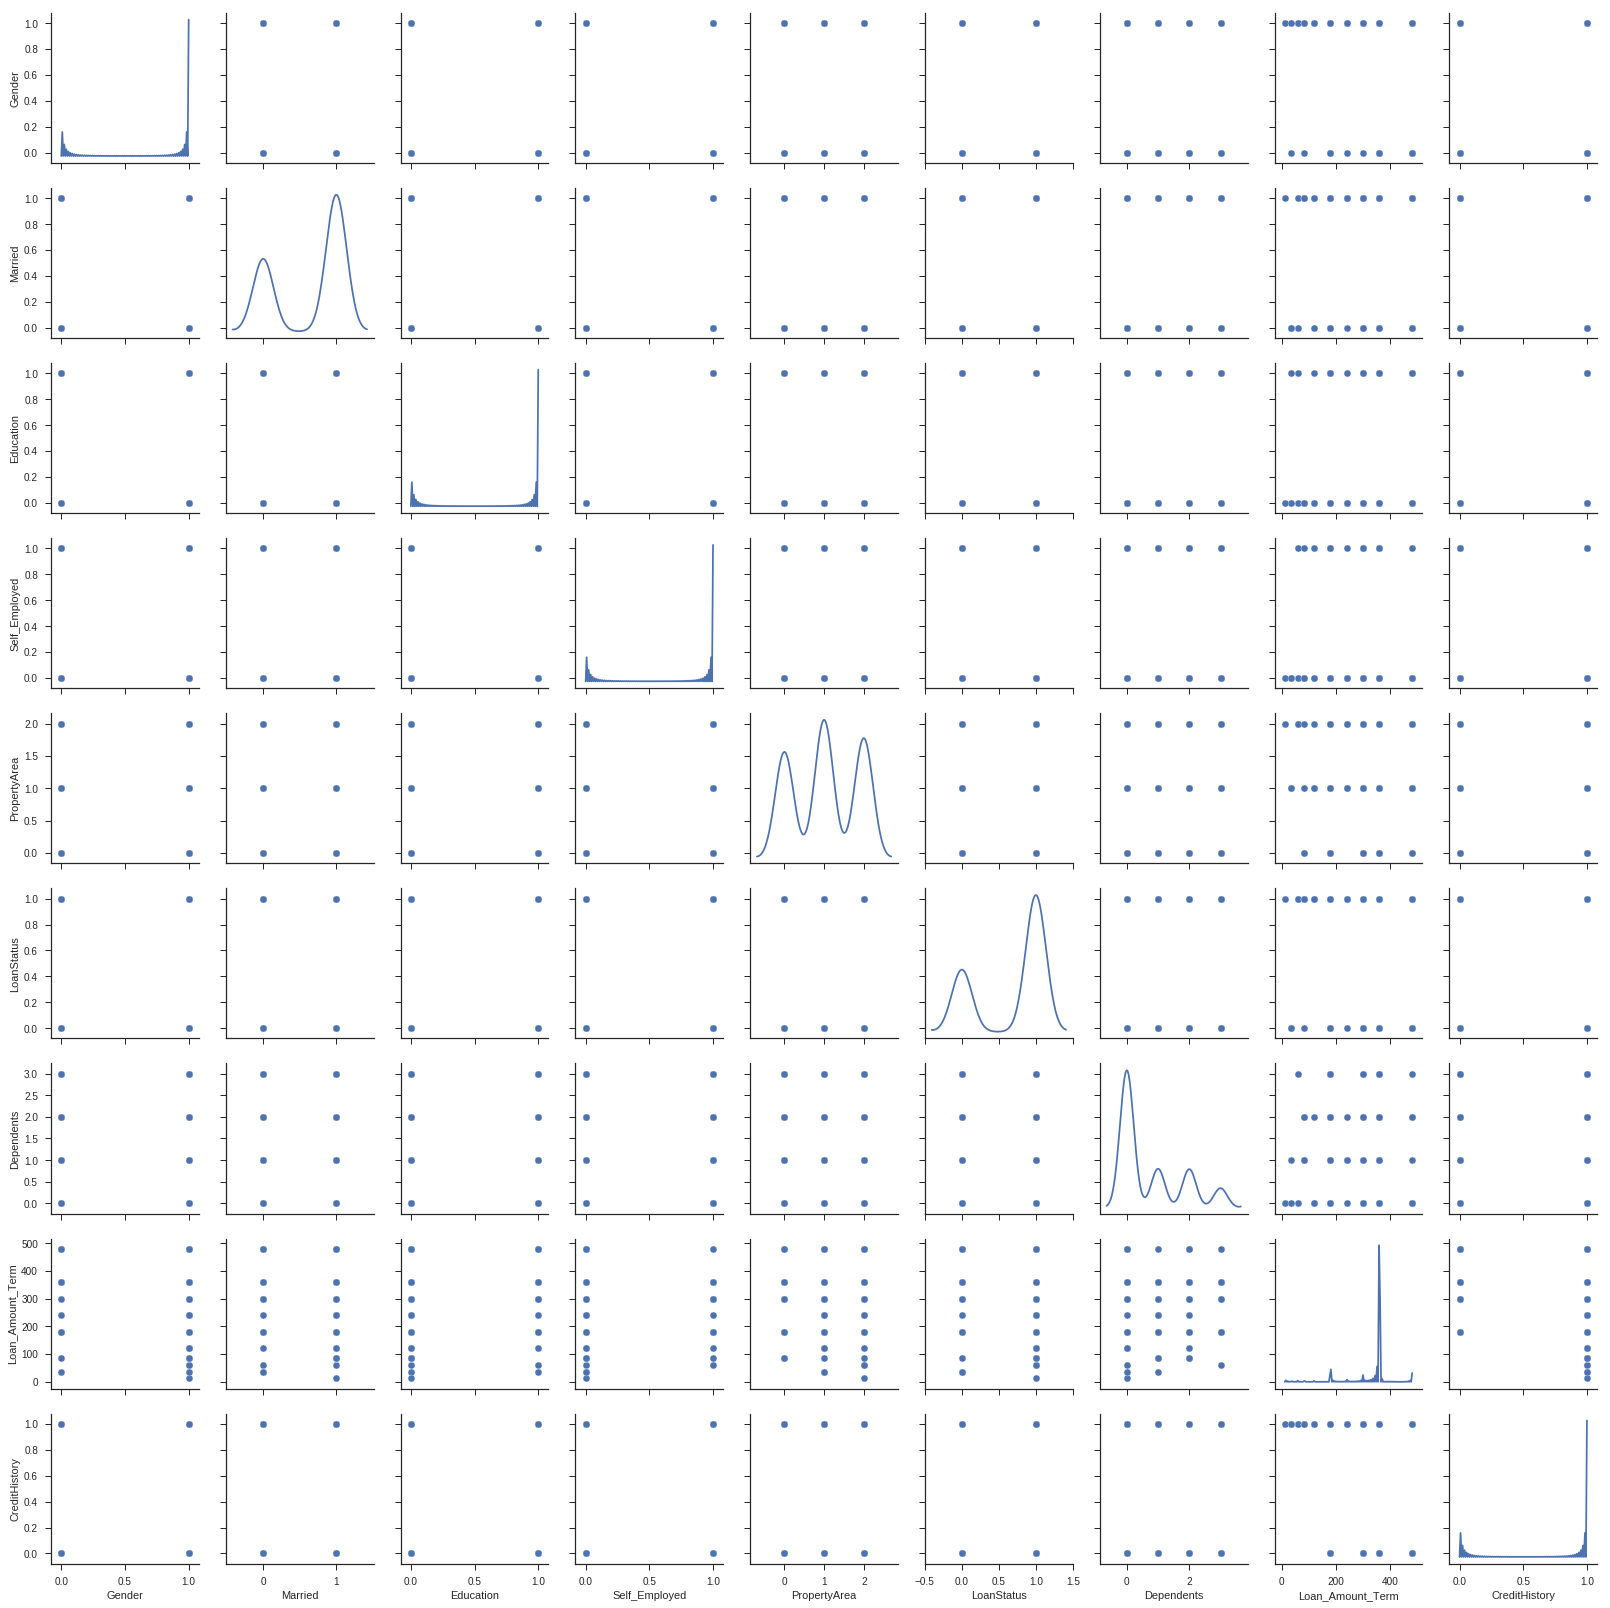

In [202]:
# Categorical variables in the given dataset are 'Gender', 'Married', 'Education', 'Self_Employed','PropertyArea','LoanStatus','Dependents','Loan_amount_Term','CreditHistory'
data2 = data_encoded[['Gender', 'Married', 'Education', 'Self_Employed','PropertyArea','LoanStatus','Dependents','Loan_Amount_Term','CreditHistory']]
sns.pairplot(data2,diag_kind="kde")

Observations: \\
'Gender', 'LoanID', 'Married', 'Education', 'Self_Employed','PropertyArea','LoanStatus', 'Dependents','Loan_amount_Term' are not normally distributed and no linear relationship has been Identified. \\
**Loan Amount Term vs Credit History** \\
1) Loan Amount Term and credit history are not lineraly related from the above pairplots.


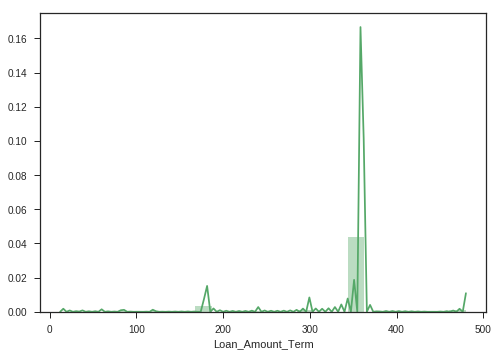

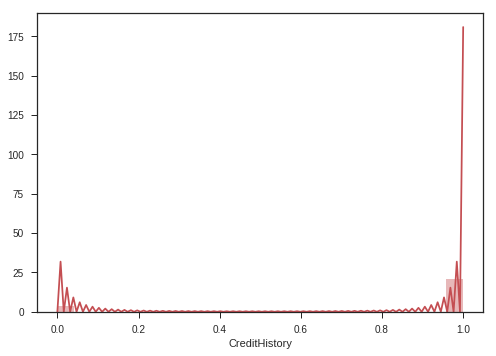

In [195]:
#check for normal distribution
sns.distplot(data['Loan_Amount_Term'],color = "g")
plt.show()
sns.distplot(data['CreditHistory'],color = "r")

Both are not normally distributed.

In [46]:
#Let's check Loan Term vs Credit History are not linearly related using Spearman's Rank correlation.
from scipy.stats import spearmanr
spearmanr(data['Loan_Amount_Term'], data['CreditHistory'])

SpearmanrResult(correlation=-0.013944561610598984, pvalue=0.7308475344661419)

In [51]:
#c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'
from scipy.stats import chi2_contingency
con = pd.crosstab(data['Loan_Amount_Term'],data['CreditHistory'])
print (con)
print ("\n")

print ("chi2 Test:")
chi2, p, dof, ex = chi2_contingency(con, correction=False)
print ("chi2 = ",chi2)
print ("p = ",p)

CreditHistory     0.0  1.0
Loan_Amount_Term          
12.0                0    1
36.0                0    2
60.0                0    2
84.0                0    4
120.0               0    3
180.0              10   37
240.0               0    3
300.0               5    9
360.0              80  440
480.0               6    9


chi2 Test:
chi2 =  13.955038688742821
p =  0.12393360170876008


with 9 degrees of freedom, for chi2 value of 14.684, p-value is 0.1 and for chi2 value of 4.168, p-value is 0.9. Since our chi2 value is 13.955 which is close 14.684 and our p-value is close to 0.1. Hence, we can say variables are not independent. \\
Reference: \\
https://www.google.com/search?biw=1280&bih=726&tbm=isch&sa=1&ei=1BzqWoaUBoTXjwSB7LOwAg&q=chi+square+distribution+table+for+degrees+of+freedom+1-100&oq=degrees+of+freedom+chi+distribution+table&gs_l=psy-ab.1.0.0i8i30k1.7647.8516.0.12621.4.4.0.0.0.0.138.491.0j4.4.0....0...1c.1.64.psy-ab..0.4.488...0i13k1j0i8i7i30k1j0i8i13i30k1.0.op3YhnDtZho#imgrc=JD49uYWAQybeIM: 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0.5,'Total'), Text(0.5,0,'Loan Amount Term')]

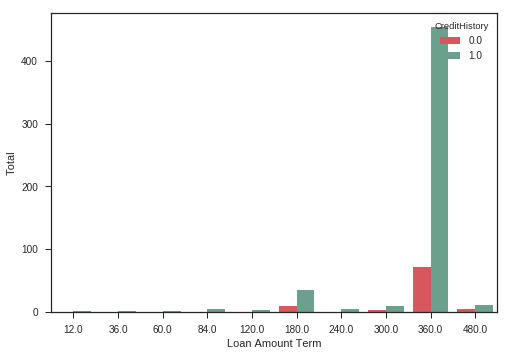

In [198]:

ax = sns.countplot(x='Loan_Amount_Term', 
                   hue='CreditHistory', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data= data)
ax.set(xlabel='Loan Amount Term', ylabel='Total')

Observation:
1) There are more number of Applicants with good credit history and loan term 360.0. In total, most applicants preffered loan term is 360.

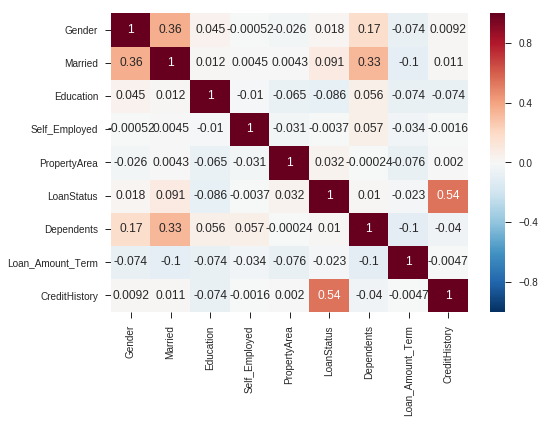

In [203]:
#Draw a heat map of correlation coefficients.
sns.set(style='ticks', color_codes=True)
sns.heatmap(data2.corr(), linecolor='white', annot=True)
plt.show()

Observations: \\
Credit histroy has a strong positive correlation with Loan status. \\
Married and Gender has a positive correlation. \\
Loan_amount_term is negative weekly correlated Dependents and Married. \\
Married and Dependents, CreditHistory and LoanStatus and Dependents and Gender has positive correlation.


**CreditHistory vs Loan Status**

Credit History vs Loan Status are not linearly related.

In [58]:
#Let's check CreditHistory vs Loan Status are not linearly related using Spearman's Rank correlation.
spearmanr(data['LoanStatus'], data['CreditHistory'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.5245215709780849, pvalue=1.7311884600067333e-44)

In [59]:
#c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

con = pd.crosstab(data['LoanStatus'],data['CreditHistory'])
print (con)
print ("\n")

print ("chi2 Test:")
chi2, p, dof, ex = chi2_contingency(con, correction=False)
print ("chi2 = ",chi2)
print ("p = ",p)

CreditHistory  0.0  1.0
LoanStatus             
N               87  105
Y               14  405


chi2 Test:
chi2 =  168.10007871542544
p =  1.9237188465870263e-38


with degrees of freedom 1 and chi-value greater than 6.635, p-value is less than 0.01. Since our chi2 value is 168, p-value is less than 0.01.
Hence,we can reject the hypothesis, that our variables are independent.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0.5,'Total'), Text(0.5,0,'LoanStatus')]

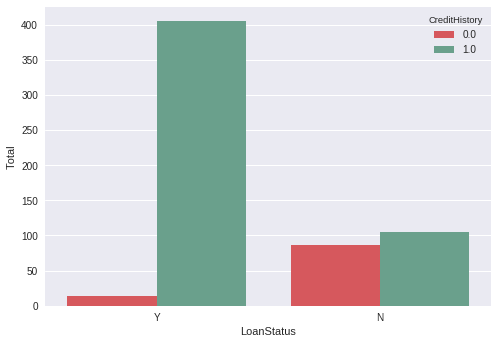

In [123]:
#CreditHistory vs Loan Status
ax = sns.countplot(x='LoanStatus', 
                   hue='CreditHistory', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data= data)
ax.set(xlabel='LoanStatus', ylabel='Total')

Observations: \\
people with good credit history has taken more number of Loans, while very few people with low credit history has taken loans. \\
There are more number of people with good credit has no loans than people with low credit history and no loans.

**Married vs Gender**

Married vs Gender are not linearly related.

In [60]:
#Let's check CreditHistory vs Loan Status are not linearly related using Spearman's Rank correlation.
spearmanr(data['Married'], data['Gender'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.36806496778140524, pvalue=4.879297738718718e-21)

In [61]:
#c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

con = pd.crosstab(data['Married'],data['Gender'])
print (con)
print ("\n")

print ("chi2 Test:")
chi2, p, dof, ex = chi2_contingency(con, correction=False)
print ("chi2 = ",chi2)
print ("p = ",p)

Gender   Female  Male
Married              
No           81   132
Yes          32   366


chi2 Test:
chi2 =  82.7732823303433
p =  9.202547226302614e-20


with 1 degree of freedom and chi2 value greater than 6.635 has p-value less than 0.01. since our chi2 value is 82.77, our chi2 is less than 0.01. \\
Hence, we can reject the hypothesis, that our variables are independent.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0.5,'Total'), Text(0.5,0,'Married')]

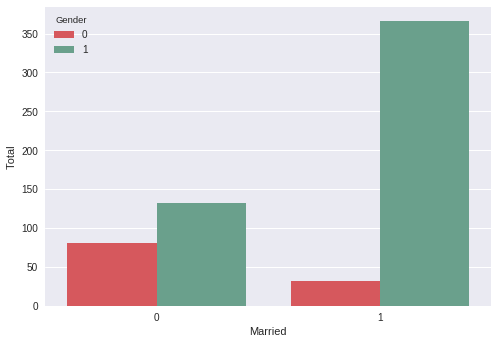

In [121]:
# Married vs Gender
ax = sns.countplot(x='Married', 
                   hue='Gender', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data= data_encoded)
ax.set(xlabel='Married', ylabel='Total')

Observations: \\
Among females, unmarried has taken the more loans than married. \\
But among the males, married people has taken more amount of loans. \\
Among all, there are least number of married female has taken loan while there are highest number of married males has taken loans.

**Loan Amount Term vs Dependents** \\
From the above pairplots, both are not linearly related.

In [209]:
#Let's check Credit Histroy vs Loan Status are not linearly related using Spearman's Rank correlation.
spearmanr(data['Loan_Amount_Term'], data['Dependents'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.12160068459347922, pvalue=0.0025426961297818434)

In [210]:
#c) Conduct the Chi-Square test to ascertain how the 'elf-employed' variable is related to 'Credit History'

con = pd.crosstab(data['Loan_Amount_Term'],data['Dependents'])
print (con)
print ("\n")

print ("chi2 Test:")
chi2, p, dof, ex = chi2_contingency(con, correction=False)
print ("chi2 = ",chi2)
print ("p = ",p)

Dependents          0   1   2  3+
Loan_Amount_Term                 
12.0                1   0   0   0
36.0                1   1   0   0
60.0                1   0   0   1
84.0                0   2   2   0
120.0               2   0   1   0
180.0              19  11   6   8
240.0               1   2   1   0
300.0               6   2   3   2
360.0             318  83  86  39
480.0              11   1   2   1


chi2 Test:
chi2 =  33.93483461738463
p =  0.16794991105656398


**Loan Amount Term vs Married** \\
Both are not linearly related

In [212]:
#Let's check Credit Histroy vs Loan Status are not linearly related using Spearman's Rank correlation.
spearmanr(data['Loan_Amount_Term'], data['Married'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.11993024474047811, pvalue=0.0029160839013805616)

In [213]:
#c) Conduct the Chi-Square test to ascertain how the 'elf-employed' variable is related to 'Credit History'

con = pd.crosstab(data['Loan_Amount_Term'],data['Married'])
print (con)
print ("\n")

print ("chi2 Test:")
chi2, p, dof, ex = chi2_contingency(con, correction=False)
print ("chi2 = ",chi2)
print ("p = ",p)

Married            No  Yes
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                1    1
84.0                0    4
120.0               1    2
180.0               8   36
240.0               1    3
300.0               3   10
360.0             188  338
480.0               9    6


chi2 Test:
chi2 =  17.3604658599664
p =  0.04336140282919573


**Step 8**: Check for Normality - Check normality by overlaying the 'ECDF' over the 'CDF'.

Reference: https://www.andata.at/en/software-blog-reader/why-we-love-the-cdf-and-do-not-like-histograms-that-much.html

Does the distribution of 'Applicant Income' follow a normal distribution?

Hint: Code Snippet has been provided. Complete the rest of the code.



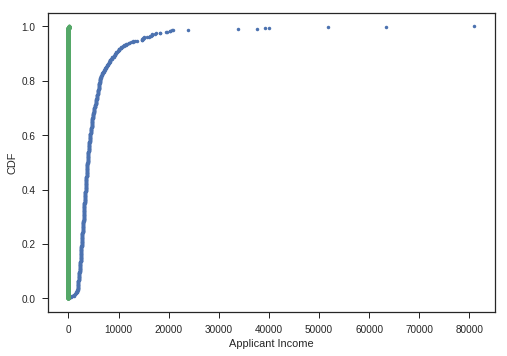

In [188]:
#Function to compute the ECDF
def ECDF(input):
 
    # Number of data points
    n = len(input)
    
    # x_data for the ECDF
    x_data = np.sort(input)

    # y_data for the ECDF
    y_data = np.arange(1, n+1) / n

    return x_data, y_data
  
  
#Checking the Normality of Data - we will compute the CDF by using np.random.samples to draw samples and then compare with ECDF
mean = np.mean(np.random.sample(100)) 
std = np.std(np.random.sample(100))


#Draw Samples
samples = np.random.normal(mean, std, size=10000)


#Compute ECDF 
data3 = data['ApplicantIncome']
x1,y1 = ECDF(data3)

#Compute CDF

x2,y2 = ECDF(samples)


# Generate plot

plt.plot(x1, y1, marker='.',linestyle='none')
plt.plot(x2, y2, marker='.',linestyle='none')

# Label the axes
plt.xlabel('Applicant Income')
plt.ylabel('CDF')
           
# Show the plot           
plt.show()

#State your conclusion
# From the graph, blue line incidates the distribution of Applicant Income and both the curves are not identical. 
#Hence, it is not normally distributed.

**Step 9:** Use Statistical Techniques to make quantitative statements on data. 

What are the chances that the bank fail? 

Let's assume for every 0 to 1000 mortgage loans the bank makes, a certain number of loans will be defaulted on. The probability of a loan default is p = 0.05 The bank will fail if there are greater than 100 defaults.

Hint: Use the techniques applied in Coding Challenge #4




In [217]:
experiments = 10000
fails = 0
for _ in range(experiments):
    defaults = np.sum(np.random.binomial(1000, 0.05))
    if defaults >= 100:
        fails += 1
        
p_fail = fails / experiments

print('A bank will fail with probability {:.2f}'.format(p_fail))

A bank will fail with probability 0.00


**Step 10**: Publish findings - In this step, you are going to conduct statistical analysis on a dataset from the Data.gov website.

1) Pick a dataset (decent size dataset - approx. 10k to 15K records)

2) Walk through the statistical analysis journey highlighted within this Sprint Challenge

3) Summarize your findings at each step of the statistical analysis journey

4) Conclude your the journey with a brief section providing an overview of your findings

5) Publish your statistical analysis journey as a blog post

6) Include a link to your blog post in your submission



I have not started yet, But I will be doing it in next 2 weeks.